In [1]:
import joblib
from tqdm.keras import TqdmCallback

import numpy as np
import tensorflow as tf

from keras.models import Sequential, load_model
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Bidirectional
from keras.layers import Dropout
from keras.utils import to_categorical
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint

from math import ceil

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, f1_score
from sklearn.utils import class_weight

import matplotlib.pyplot as plt

/Users/arpanmukhopadhyay/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
X_train = joblib.load('full/X_train')

X_test = joblib.load('full/X_test')

y_train = joblib.load('full/y_train')

y_test = joblib.load('full/y_test')

In [64]:
yTrainBinaryClass = np.array([1 if x == 'MI' else 0 for x in y_train])

yTestBinaryClass = np.array([1 if x == 'MI' else 0 for x in y_test])

In [66]:
np.mean(yTrainBinaryClass), np.mean(yTestBinaryClass)

(0.8037303033551292, 0.8358615004122012)

In [71]:
classWeights = {i:x for i,x in enumerate(class_weight.compute_class_weight(class_weight='balanced', classes=[0,1], y=yTrainBinaryClass))}

In [69]:
regress = l2(0.00001)

In [68]:
checkpoint = ModelCheckpoint('model_outputs', monitor='val_accuracy', verbose=0, save_best_only=True, mode='max')
model = Sequential()
model.add(Bidirectional(LSTM(64, input_shape=(600,12), return_sequences=True, kernel_regularizer=regress, recurrent_regularizer=regress)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(32, return_sequences=True, kernel_regularizer=regress, recurrent_regularizer=regress)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(8, kernel_regularizer=regress, recurrent_regularizer=regress)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='Nadam',
              metrics=['accuracy'])

In [70]:
history = model.fit(X_train, yTrainBinaryClass, class_weight=classWeights,
          batch_size=64, epochs=20,
          validation_data=(X_test, yTestBinaryClass),
          verbose=0, callbacks=[TqdmCallback(verbose=1), checkpoint])

NameError: name 'classWeights' is not defined

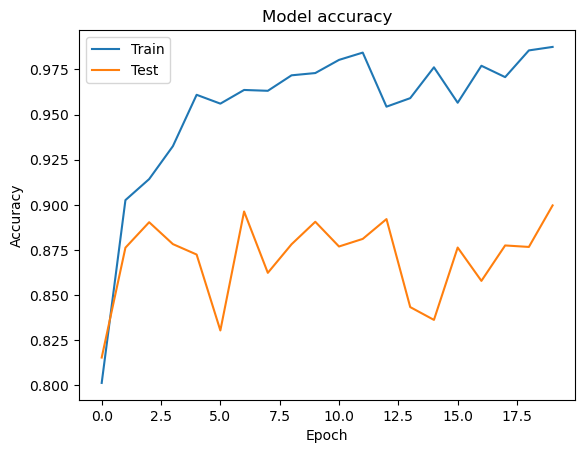

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

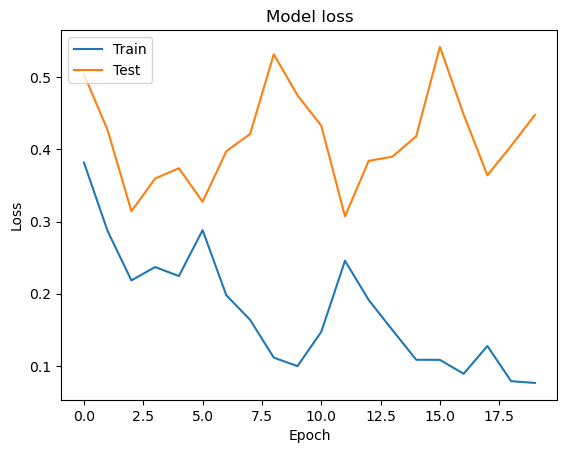

In [60]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

In [37]:
count = 1
for n in history.history['accuracy']:
    print(f"epoch {count} accuracy: {round(n*100,2)}%")
    count += 1

epoch 1 accuracy: 80.14%
epoch 2 accuracy: 90.26%
epoch 3 accuracy: 91.42%
epoch 4 accuracy: 93.25%
epoch 5 accuracy: 96.09%
epoch 6 accuracy: 95.6%
epoch 7 accuracy: 96.36%
epoch 8 accuracy: 96.31%
epoch 9 accuracy: 97.17%
epoch 10 accuracy: 97.3%
epoch 11 accuracy: 98.02%
epoch 12 accuracy: 98.43%
epoch 13 accuracy: 95.43%
epoch 14 accuracy: 95.91%
epoch 15 accuracy: 97.61%
epoch 16 accuracy: 95.65%
epoch 17 accuracy: 97.7%
epoch 18 accuracy: 97.07%
epoch 19 accuracy: 98.55%
epoch 20 accuracy: 98.74%


In [32]:
count = 1
for n in history.history['val_accuracy']:
    print(f"epoch {count} test_accuracy: {round(n*100,2)}%")
    count += 1

epoch 1 test_accuracy: 81.54%
epoch 2 test_accuracy: 87.63%
epoch 3 test_accuracy: 89.04%
epoch 4 test_accuracy: 87.82%
epoch 5 test_accuracy: 87.25%
epoch 6 test_accuracy: 83.04%
epoch 7 test_accuracy: 89.63%
epoch 8 test_accuracy: 86.23%
epoch 9 test_accuracy: 87.82%
epoch 10 test_accuracy: 89.06%
epoch 11 test_accuracy: 87.69%
epoch 12 test_accuracy: 88.11%
epoch 13 test_accuracy: 89.21%
epoch 14 test_accuracy: 84.34%
epoch 15 test_accuracy: 83.63%
epoch 16 test_accuracy: 87.63%
epoch 17 test_accuracy: 85.79%
epoch 18 test_accuracy: 87.75%
epoch 19 test_accuracy: 87.67%
epoch 20 test_accuracy: 89.97%


In [59]:
count = 1
for n in history.history['val_loss']:
    print(f"epoch {count} test_loss: {round(n*100,2)}%")
    count += 1

epoch 1 test_loss: 50.41%
epoch 2 test_loss: 42.67%
epoch 3 test_loss: 31.44%
epoch 4 test_loss: 35.98%
epoch 5 test_loss: 37.4%
epoch 6 test_loss: 32.75%
epoch 7 test_loss: 39.76%
epoch 8 test_loss: 42.14%
epoch 9 test_loss: 53.19%
epoch 10 test_loss: 47.5%
epoch 11 test_loss: 43.29%
epoch 12 test_loss: 30.73%
epoch 13 test_loss: 38.43%
epoch 14 test_loss: 39.01%
epoch 15 test_loss: 41.83%
epoch 16 test_loss: 54.21%
epoch 17 test_loss: 44.84%
epoch 18 test_loss: 36.41%
epoch 19 test_loss: 40.51%
epoch 20 test_loss: 44.78%


In [1]:
con_mat = confusion_matrix(Y_test, Y_train)

NameError: name 'confusion_matrix' is not defined